# Introdução a Análise de Regressão em Python

Análises de regressão são muito usadas para se entender a relação entre variáveis. Neste notebook apresentamos conceitos básicos do uso da biblioteca [StatsModels](https://www.statsmodels.org), que implementa uma grande gama de modelos de regressão.

In [1]:
# Importação de pacotes
import pandas as pd
from statsmodels.formula.api import ols

## Lendo dados de um arquivo

O DataFrame carregado contém dados de altura e peso de crianças em idade escolar. As colunas representam o código de estudante (RA), altura em metros (height) e peso em kg (weight).

In [2]:
# lê o arquivo CSV
df = pd.read_csv('HeightWeight.csv')

# convertendo a altura para centímetros para simplificar a interpretação
df['Height'] = df['Height'] * 100

# mostra o conteúdo do DataFrame
df.head(3)

,RA,Height,Weight
0,347333,160.02,49.441572
1,418955,165.10,62.595751
2,769270,165.10,75.749931


## Entendendo as variáveis

É de se esperar que exista uma associação entre a altura e o peso (massa, na verdade) de uma pessoa. Em geral, quanto mais alta a pessoa, maior será sua massa. Podemos ver isto no diagrama de dispersão abaixo.

<AxesSubplot:xlabel='Height', ylabel='Weight'>

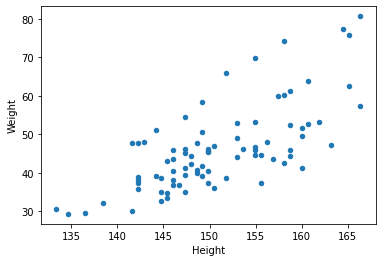

In [3]:
df.plot.scatter('Height', 'Weight')

Já não esperaríamos uma associação entre as variáveis peso e RA, pois em geral o RA não vai influenciar no peso de uma pessoa (exercício: você consegue pensar em uma situação onde possa existir uma associação entre essas variáveis?). Veja que o gráfico abaixo mostra que não há relação entre RA e peso (não há tendência de crescimento nem queda nos valores de peso à medida que o RA aumenta).

<AxesSubplot:xlabel='RA', ylabel='Weight'>

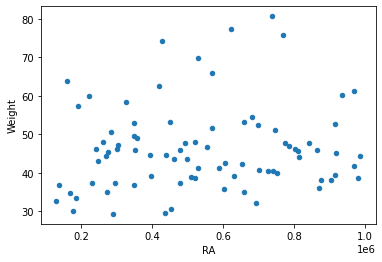

In [4]:
df.plot.scatter('RA', 'Weight')

## Regressão Linear


Podemos criar um modelo de regressão para entender os fatores que influenciam o peso. Em termos estatísticos, dizemos que o peso é nossa variável dependente (que depende dos valores das outras). Vamos começar criando um modelo que use a altura para explicar o peso. A altura é chamada de variável independente. No statsmodels podemos representar nosso modelo como no código abaixo:

In [5]:
model = ols("Weight ~ Height", data=df)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     81.05
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           7.85e-14
Time:                        10:06:04   Log-Likelihood:                -287.88
No. Observations:                  83   AIC:                             579.8
Df Residuals:                      81   BIC:                             584.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -112.1760     17.622     -6.366      0.000    -147.239     -77.113
Height         1.0501      0.117      9.003      0.000       0.818       1.282
==============================================================================
Omnibus:                        8.870   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.805
Skew:                           0.785   Prob(JB):                       0.0122
Kurtosis:                       3.280   Cond. No.                     3.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

No modelo acima, podemos identificar o coeficiente da variável altura (1.0501) e o ponto de interseção (-112.1760). O coeficiente da altura é interpretado como: para cada aumento de uma unidade de altura (1cm), há um aumento médio de 1.05kg no peso das pessoas do estudo.

Adicionando a interseção, o modelo identificou a seguinte relação linear entre os termos:

$peso = 1.05 \times altura - 112$

Portanto, para uma pessoa de 140cm, o modelo espera um peso de $1.05 \times 140 - 112 = 35kg$. Para usar o modelo para prever este valor, usamos os comandos abaixo:

In [6]:
nova_pessoa = pd.DataFrame([{'RA': 236782, 'Height': 140}])
response.predict(nova_pessoa)

0    34.836353
dtype: float64

O p-value ($P>|t|$) da variável altura é igual a (na verdade próximo de) 0, portanto dizemos que a associação econtrada entre as variáveis é estatisticamente significante (ou seja, é improvável que tenhamos encontrado esta associação como efeito de problemas de amostragem).

## Regressão linear múltipla

As regressões ficam mais interessantes quando usamos mais variáveis para explicar uma variável dependente. Por exemplo, podemos tentar adicionar o RA na explicação do peso. O código abaixo cria este modelo:

In [7]:
model = ols("Weight ~ RA + Height", data=df)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     40.32
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           7.77e-13
Time:                        10:06:04   Log-Likelihood:                -287.73
No. Observations:                  83   AIC:                             581.5
Df Residuals:                      80   BIC:                             588.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -112.2745     17.701     -6.343      0.000    -147.500     -77.049
RA          1.927e-06   3.56e-06      0.541      0.590   -5.17e-06    9.02e-06
Height         1.0438      0.118      8.866      0.000       0.810       1.278
==============================================================================
Omnibus:                        9.081   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.061
Skew:                           0.797   Prob(JB):                       0.0108
Kurtosis:                       3.285   Cond. No.                     1.22e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

No modelo criado acima, vemos que o coeficiente do RA é baixíssimo, o que confirma nossa expectativa de não haver influência. Além disso, o p-value é alto (maior que 0.05), considerado não estatisticamente significativo.

Neste exemplo a variável RA não ajudou o modelo, mas podemos imaginar diversas variáveis que ajudariam, como quantidade média de calorias diárias, atividades físicas, fatores genéticos, etc.